# Manage Json Files

The first few intial cells are just to parse and extract necessary data from the json files

In [1]:
print(__import__('sys').version)

3.6.7 |Anaconda, Inc.| (default, Oct 28 2018, 19:44:12) [MSC v.1915 64 bit (AMD64)]


In [ ]:
# Package            Version
# ------------------ -----------
# arm-pyart          1.9.2
# asn1crypto         0.24.0
# attrs              18.2.0
# backcall           0.1.0
# basemap            1.2.0
# bleach             3.0.2
# boto               2.49.0
# boto3              1.9.71
# botocore           1.12.71
# Cartopy            0.17.0
# certifi            2018.11.29
# cffi               1.11.5
# cftime             1.0.3.4
# chardet            3.0.4
# colorama           0.4.1
# cryptography       2.3.1
# cycler             0.10.0
# Cython             0.29.2
# decorator          4.3.0
# deprecation        2.0.5
# docutils           0.14
# entrypoints        0.2.3
# GDAL               2.2.2
# h5py               2.8.0
# idna               2.8
# ipykernel          5.1.0
# ipython            7.2.0
# ipython-genutils   0.2.0
# ipywidgets         7.4.2
# jedi               0.13.2
# Jinja2             2.10
# jmespath           0.9.3
# jsonschema         3.0.0a3
# jupyter            1.0.0
# jupyter-client     5.2.4
# jupyter-console    6.0.0
# jupyter-core       4.4.0
# kiwisolver         1.0.1
# lxml               4.2.5
# MarkupSafe         1.1.0
# matplotlib         3.0.2
# mistune            0.8.4
# mkl-fft            1.0.10
# mkl-random         1.0.2
# nbconvert          5.3.1
# nbformat           4.4.0
# netCDF4            1.3.1
# nose               1.3.7
# notebook           5.7.4
# numpy              1.15.4
# olefile            0.46
# OWSLib             0.17.0
# packaging          18.0
# pandas             0.23.4
# pandocfilters      1.4.2
# parso              0.3.1
# pickleshare        0.7.5
# Pillow             5.3.0
# pip                18.1
# prometheus-client  0.5.0
# prompt-toolkit     2.0.7
# pycparser          2.19
# pyepsg             0.4.0
# Pygments           2.3.1
# pykdtree           1.3.1
# pyOpenSSL          18.0.0
# pyparsing          2.3.0
# pyproj             1.9.5.1
# pyreadline         2.1
# pyrsistent         0.14.8
# pyshp              2.0.1
# PySocks            1.6.8
# python-dateutil    2.7.5
# pytz               2018.7
# pywinpty           0.5.5
# pyzmq              17.1.2
# qtconsole          4.4.3
# requests           2.21.0
# s3transfer         0.1.13
# scipy              1.1.0
# Send2Trash         1.5.0
# setuptools         40.6.3
# Shapely            1.6.4.post2
# six                1.12.0
# terminado          0.8.1
# testpath           0.4.2
# toolz              0.9.0
# tornado            5.1.1
# traitlets          4.3.2
# urllib3            1.24.1
# wcwidth            0.1.7
# webencodings       0.5.1
# wheel              0.32.3
# widgetsnbextension 3.4.2
# win-inet-pton      1.0.1
# wincertstore       0.2
# wradlib            1.2.1
# xarray             0.11.0
# xmltodict          0.11.0

In [1]:
import json

In [2]:
import pickle

In [3]:
from datetime import datetime

In [4]:
from numpy import int64, array, meshgrid, linspace, histogram2d, log, where, empty, argsort
from numpy.random import randint, choice

In [5]:
from pandas import DataFrame

In [6]:
from matplotlib.pyplot import figure, title, legend, scatter, show, xticks, xlabel,\
                              ylabel, colorbar, pcolormesh, hist, axis, imshow, gcf
from matplotlib.colors import LogNorm
%matplotlib inline

In [7]:
from os import path

In [8]:
from PIL import Image

In [9]:
from wordcloud import WordCloud, STOPWORDS

In [1]:
from toolz import curry, compose # You do not need to import this unless you want to
                                 # process the original json files again

In [2]:
# If this fails you can try the next cell
from mpl_toolkits.basemap import Basemap

In [3]:
# I have used mpl_toolkits basemap for the geographical map but ran into
# an issue with importing. If you are using anaconda then this cell may need to be run
# It may just be a windows thing :(

import os
                         # This needs to be your anaconda install location
os.environ['PROJ_LIB'] = r'C:\anaconda3\pkgs\proj4-5.1.0-hfa6e2cd_1\Library\share' 

from mpl_toolkits.basemap import Basemap, cm

I narrowed down the keys in the json objects that were of interest to the exercise. These were:

time = json_obj['created_at'],

tweet = json_obj['text'],

location could either be

json_obj['coordinates'] depending whether location services are activated etc...

or

json_obj['place']['bounding_box']['coordinates'],

user_name = ['user']['screen_name'] (This is unique to a user and human readable).

In [27]:
file_ranges = [*range(603, 613), *range(701, 709)]

print(file_ranges)

[603, 604, 605, 606, 607, 608, 609, 610, 611, 612, 701, 702, 703, 704, 705, 706, 707, 708]


In [28]:
file_names = [r'southwestall201%s' % num for num in file_ranges]

print(file_names)

['southwestall201603', 'southwestall201604', 'southwestall201605', 'southwestall201606', 'southwestall201607', 'southwestall201608', 'southwestall201609', 'southwestall201610', 'southwestall201611', 'southwestall201612', 'southwestall201701', 'southwestall201702', 'southwestall201703', 'southwestall201704', 'southwestall201705', 'southwestall201706', 'southwestall201707', 'southwestall201708']


In [29]:
def load_json(fname):
    with open(r'%s.json' % fname, 'r') as open_file:
        for tweet in open_file:
            yield json.loads(tweet)

In [85]:
def load_pickle(fname):
    with open(r'%s_filtered.txt' % fname, 'rb') as open_file:
        return pickle.load(open_file)

In [82]:
def dump_pickle(fname, data):
    with open(r'%s_created' % fname, 'wb') as open_file:
        pickle.dump(data, open_file)

In [35]:
def filter_data(tweet):
    '''
    Creates a new dictionary object with fields of interest from a 
    json dictionary object
    '''
    new_obj = {}
    new_obj['tweet'] = tweet['text']
    _, m, d, _, _, y = tweet['created_at'].split()
    new_obj['created_at'] = '%s %s %s' % (d, m, y)
    new_obj['screen_name'] = tweet['user']['screen_name']
    type_ = 0
    
    if tweet['coordinates']:                                           # The most accurate location metric appears to
                                                                       # be 'coordinates'. Although this depends on whether
        new_obj['coordinates'] = tweet['coordinates']['coordinates']   # the use has location services enabled.
        type_ +=1

    if tweet['place']:
        new_obj['place'] = array(tweet['place']['bounding_box']['coordinates']).reshape(4, 2).mean(axis=0)
        type_ +=1
    new_obj['location_type'] = type_
    return new_obj

I decompressed the json files using 7zip which came to about 100 GB. In hindsight this was unnecessary but as I had enough space on my hard drive, it was not an issue.

The following three cells do not need to be run unless you are processing the original json files.

In [36]:
mapped_filter = curry(map)(filter_data) # maps the load_json_obj generator to the filter

In [12]:
# creates list of new dict objs representing tweets with values of interest

get_data = compose(
                   list,           # list function draws objects out of generator and through filter
                   mapped_filter,
                   load_json,
                   )

In [ ]:
# This will parse the original json files and create some new data structures and pickle them
# It will take about 20 minutes - At this point I went and had a cup of tea but you can skip
# this cell and carry on with the pickle files I provided

for fname in file_names:
    data = get_data(fname)   
    dump_pickle(fname, data) # pickles list of new dict objs

All of the cells from now on make use of the pickled data structures.

In [33]:
total_tweets = 0 # Task 1.2
user_counts_dict = {} # counts tweets per user
day_counts_dict = {} # counts tweets per day
gps_list = []
place_list_t1 = [] # users who have just 'place'
place_list_t2 = [] # users who have 'coordinates' and 'place'

In [39]:
# We will loop through the pickled data and populate the dictionaries and list
# This will take about 5 minutes
# I have the new data structure pickled so you can skip this part

for fname in file_names:
    list_of_tweets = load_pickle(fname)
    for tweet in list_of_tweets:
        total_tweets += 1
        if tweet['screen_name'] in user_counts_dict: # count tweets per user
            user_counts_dict[tweet['screen_name']] += 1
        else:
            user_counts_dict[tweet['screen_name']] = 1
        if tweet['created_at'] in day_counts_dict: # count tweets per day
            day_counts_dict[tweet['created_at']]['count'] += 1
        else:
            # each day will have a count, and a datetime object for plotting timeseries
            day_counts_dict[tweet['created_at']] = {
                                                    'count': 1,
                                                    'datetime': datetime.strptime(tweet['created_at'], '%d %b %Y')
                                                    }

        if 'coordinates' in tweet: # collect gps coordinates of all tweets
            gps_list.append(tweet['coordinates'])     
        if 'place' in tweet:
            if tweet['location_type'] == 1:
                place_list_t1.append(tweet['place']) # type 1 == just 'place'
            else:
                place_list_t2.append(tweet['place']) # type 2 == 'place' and 'coordinates'
            
gps_array = array(gps_list)

place_array_t1 = array(place_list_t1)

place_array_t2 = array(place_list_t2)

In [40]:
print('Task 1.2: Total number of tweets in the data set:', total_tweets)

Task 1.2: Total number of tweets in the data set: 25292373


In [41]:
# Above data was saved in this format

six_tuple = total_tweets, user_counts_dict, day_counts_dict, gps_list, place_list_t1, place_list_t2

dump_pickle('six_tuple', six_tuple)

In [44]:
# To load pickled data for next sections

total_tweets, user_counts_dict, day_counts_dict, gps_list, place_list_t1, place_list_t2 = load_pickle('six_tuple')

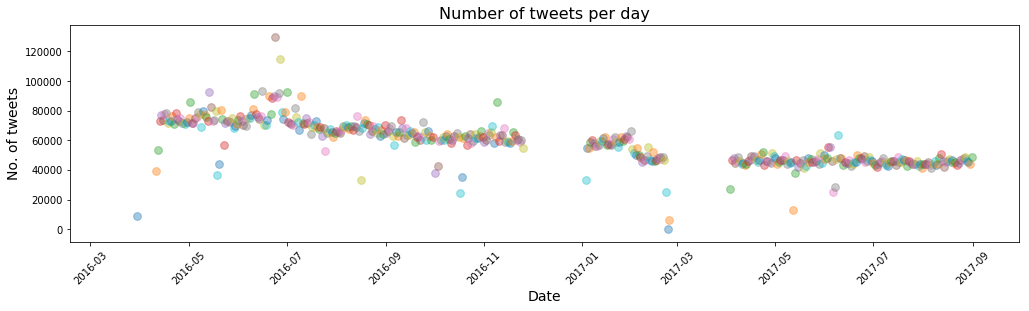

In [11]:
# Now to plot the timeseries of tweets per day

figure(figsize=(17, 4))

title('Number of tweets per day', fontsize=16)

for day in day_counts_dict:
    
    scatter(
            day_counts_dict[day]['datetime'],
            day_counts_dict[day]['count'],
            alpha=0.4,
            s=60,
            )

xlabel('Date', fontsize=14); ylabel('No. of tweets', fontsize=14)
xticks(rotation=45)
show()

It can be seen in the above timeseries that there is an overall decrease in the number of tweets per day over the sampled time frame. This could suggest a decrease in the popularity and/or usage of Twitter. Another possibility is that there is a large peak which occurs at the end of June 2016. It looks as though the event that has caused this peak may have caused a large build up in activity over time. This may have started well before March 2016, which is as early as we have sampled, and so is not represented in the timeseris. Furthermore, it is also apparent that there are some large gaps in the data in December 2016 and March 2017. This could be due to curruption or data loss by Twitter.

Considering the above plot, there are three obvious points of interest (which we will label POI) where there seems to be spikes in twitter activity. The most obvious, POI1, occurs in late June 2016 and is the largest number of tweets in the data set. POI2 and POI3 are early November 2016 and early June 2017. Although these points are not as high as a lot of the data they do show deviation from the normal activity in their immediate vicinity. Plotting the data in this manner has allowed the identification of POI 2 and 3 as they are lower in number of tweets than a lot of the data set and therefore a search for the highest four peaks may have missed them. The next step is to identify the specific days that these events occured.

In [46]:
def scatter_map(
                data,
                lllon,                    # lower left lon
                lllat,                    # lower left lat
                urlon,                    # upper right lon
                urlat,                    # upper right lat
                cllw=0.25,                # coastline linewidth
                culw=0.25,                # country linewidth
                draw_countries=False,     # draw countries?
                res='l',                  # resolution
                figsize=(10, 10),         # size of figure
                fig_title='figure title', # main figure title
                marker_size=5
                 ):
    
    ''' 
    A simple function to scatter gps coordinates onto a map
    '''
    
    figure(figsize=figsize)

    m = Basemap(
                projection='mill',
                llcrnrlon=lllon,   # lower left lon
                llcrnrlat=lllat,   # lower left lat
                urcrnrlon=urlon,   # upper right lon
                urcrnrlat=urlat,   # upper right lat
                resolution=res,
                )
    
    x, y = data

    m.drawcoastlines(linewidth=cllw)
    
    if draw_countries:
        
        m.drawcountries(linewidth=culw)
        
    title(fig_title, fontsize=15)
        
    m.scatter(x, y, latlon=True, s=marker_size, c='r', alpha=0.6)

    show()

The twitter json objects record multiple location metrics. If the user has location services enabled, there is a metric called 'coordinates' which records the users location using the GPS ability of the device on which twitter is being used. This is expected to be the most accurate measure of a tweets' location and so this is the metric we will plot initially.

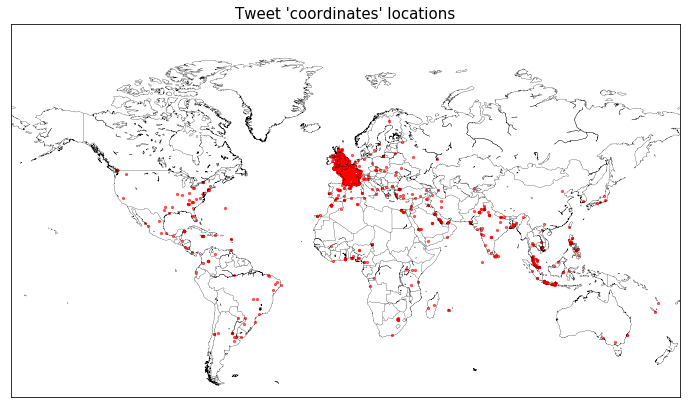

In [13]:
scatter_map(gps_array.T,
            -180, -60, 180, 90,
            draw_countries=True,
            fig_title='Tweet \'coordinates\' locations',
            figsize=(12, 12))

The above map shows that there are a number of tweets that have originated outside of the original location query. Why would twitter be returning search results that are outside of the location query?

Below is a heatmap of population density and it can be seen that the tweet locations correspond to areas with high population density.

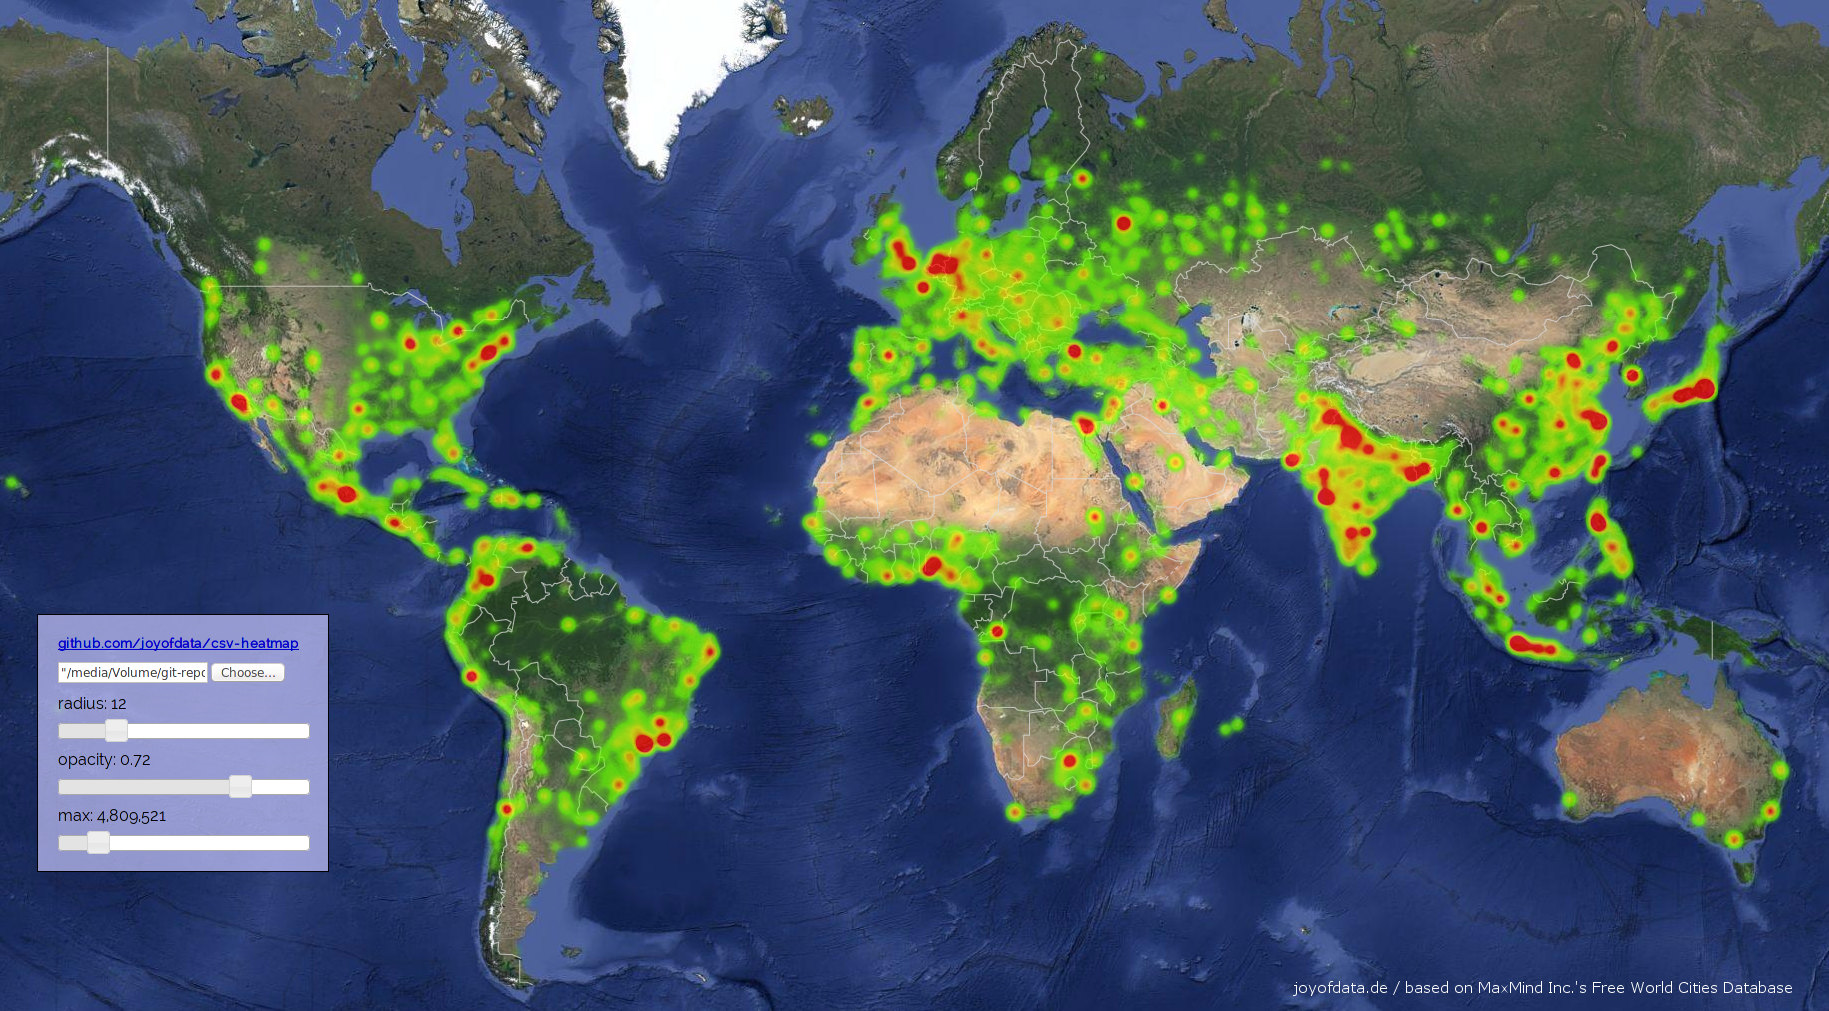

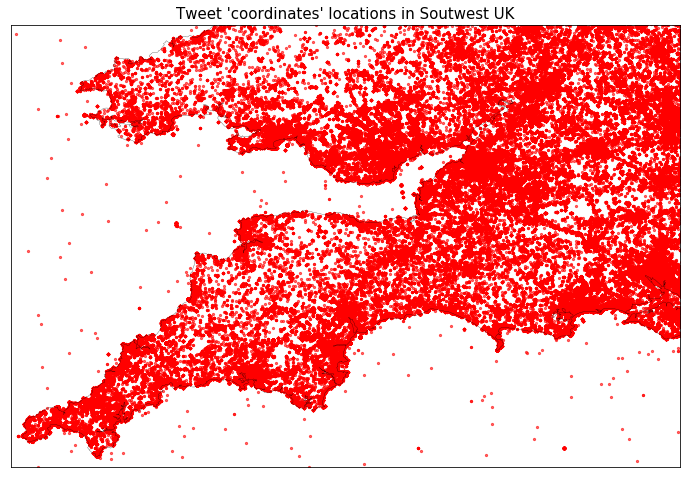

In [14]:
scatter_map(gps_array.T,
            -5.8,
             49.9,
             -1.2,
             52.2,
            draw_countries=True,
            fig_title='Tweet \'coordinates\' locations in Soutwest UK',
            res='h',
            figsize=(12, 12))

Zooming in it is possible to see tweet locations in the ocean around the coast.

The twitter json objects also record another location metric called 'place'. Tweets rarely have the 'coordinates' location metric but nearly always have 'place'. If a tweet has the 'coordinates' metric it will normally have 'place' aswell. The 'place' metric is a location which the user can select to associate the tweet with that location. Below is a plot of the 'place' metric from tweets which have both 'place' and 'coordinates' (type 2).

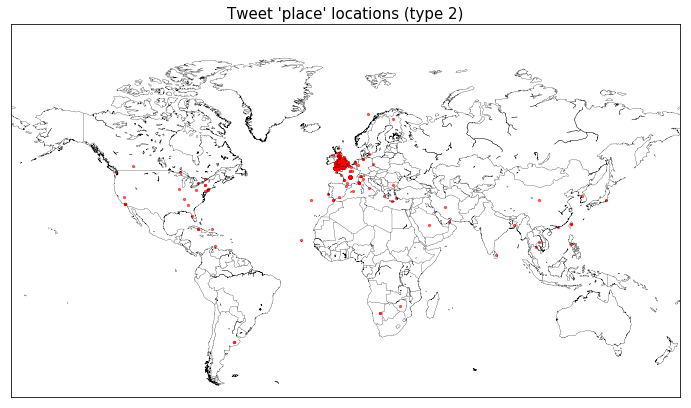

In [49]:
scatter_map(place_array_t2.T,
            -180, -60, 180, 90,
            draw_countries=True,
            fig_title='Tweet \'place\' locations (type 2)',
            res='l',
            figsize=(12, 12))

It is apparent that there is a discrepancy between the 'place' and 'coordinates' metric in the tweet objects which have both metris. The density of tweets outside the query location is much lower for 'coordinates' than it is for 'place'. The reason for the 'coordinates' tweets which appear to be outside of the original query, appearing within the query, is that they also have a 'place' location which is within the query's bounding box. It is apparent that twitter returns results if a single location metric satisfies the query. Ergo, the results are indicative of people who are outside of the query location, tweeting about the query location. 

It is also possible to see people within the query location tweeting about places outside the query location. This would be evidenced by a 'coordinates' value inside the query bounding-box but a 'place' value outside. It is further possible to assert that people within the query location are tweeting about places outside the query, far less than the inverse.

The above plot used tweets which only have the 'place' location metric. Below is a plot of the 'place' metric from tweets which have both 'place' and 'coordinates'.

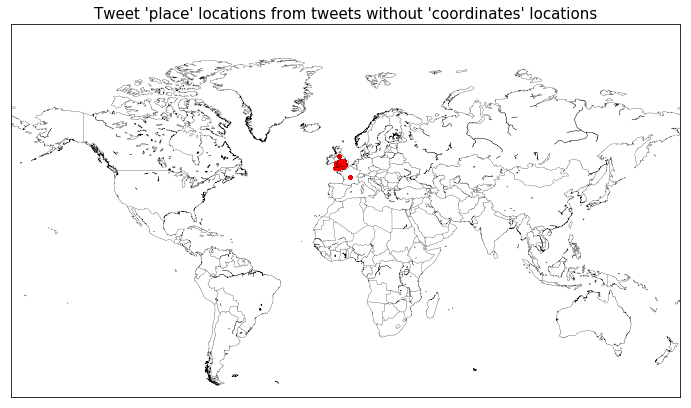

In [48]:
scatter_map(place_array_t1.T,
            -180, -60, 180, 90,
            draw_countries=True,
            fig_title='Tweet \'place\' locations (type 1)',
            res='l',
            figsize=(12, 12))

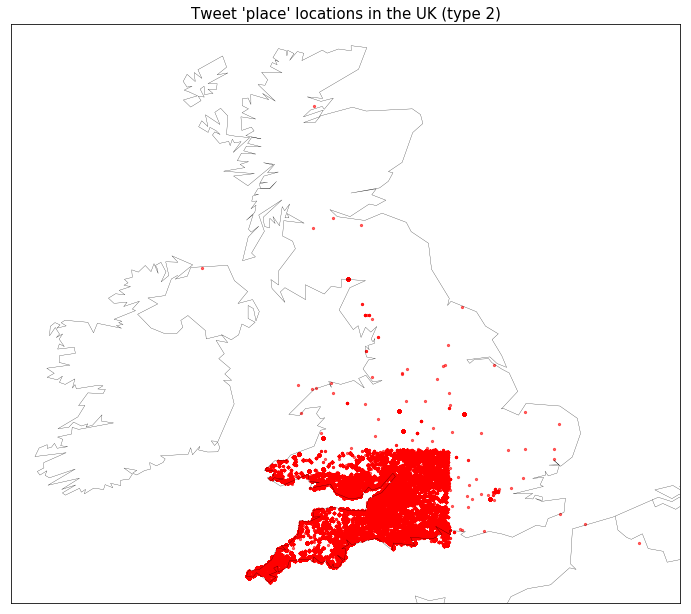

In [56]:
scatter_map(place_array_t2.T,
            -11,
            49.6,
            4,
            59,
            draw_countries=True,
            fig_title='Tweet \'place\' locations in the UK (type 2)',
            res='l',
            figsize=(12, 12))

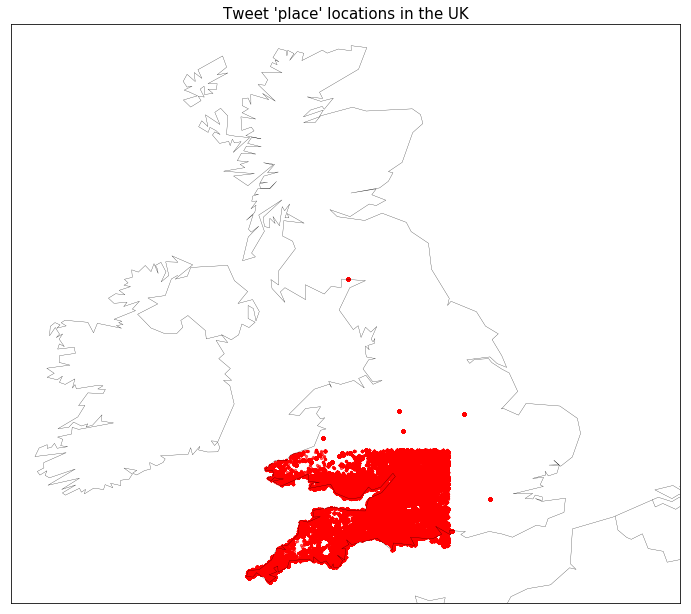

In [485]:
scatter_map(place_array_t1.T,
            -11,
            49.6,
            4,
            59,
            draw_countries=True,
            fig_title='Tweet \'place\' locations in the UK',
            res='l',
            figsize=(12, 12))

It can be seen above that there are a few members of the type 1 'place' tweets outside of the query box. As they are type 1, they have no 'coordinates' metric. The reason that Twitter may think they have originated in the South West is that there are further metrics Twitter uses to measure location. Another is named 'location' in the json objects. This is a location a user associates their account with when they sign up. This can also be updated later on. It is possible that these users have their 'location' set as in the South West. Another possibility is that Twitter is using tweet content to measure a tweets location. For example, if a user tweets about french wine and there are no other location metrics available, the algorithm may determine the user is in France.  

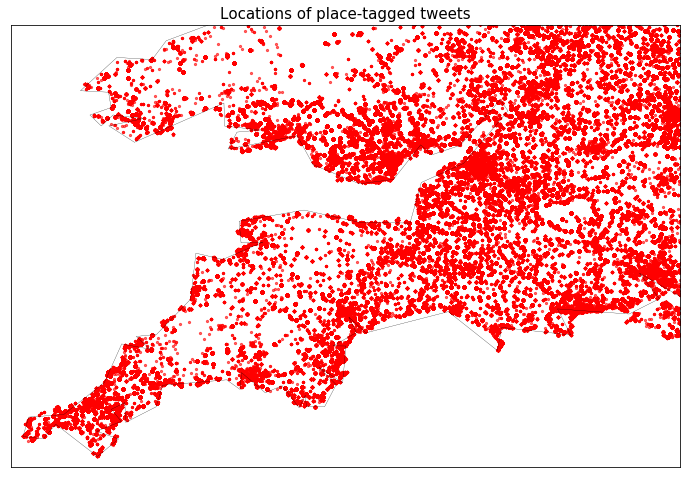

In [135]:
scatter_map(place_array_t2.T,
            -5.8,
             49.9,
             -1.4,
             52.4,
            draw_countries=True,
            fig_title='Tweet \'place\' locations in the Southwest',
            res='l',
            figsize=(12, 12))

There are now no tweet locations in the ocean. This is because the manner in which the 'place' location is selected. There are specific Twitter designated 'place' locations so the metric is somewhat discrete in that only certain locations are valid 'place' locations.

In [50]:
def heat_map(
             data,
             lllon,                    # lower left lon
             lllat,                    # lower left lat
             urlon,                    # upper right lon
             urlat,                    # upper right lat
             cllw=0.25,                # coastline linewidth
             culw=0.25,                # country linewidth
             draw_countries=False,     # draw countries?
             res='h',                  # resolution
             nbins=100,                # number of bins
             figsize=(10, 10),         # size of figure
             fig_title='figure title', # main figure title
             log_dens=False,           # whether density will be logrithmic
             marker_size=5,            
             colmap='Reds',                   # colour map
             ): 
    
    ''' 
    A function to plot density of gps coordinates on to a map
    
    '''
    
    figure(figsize=figsize)

    m = Basemap(
                projection='mill',
                llcrnrlon=lllon,   # lower left lon
                llcrnrlat=lllat,   # lower left lat
                urcrnrlon=urlon,   # upper right lon
                urcrnrlat=urlat,   # upper right lat
                resolution=res,
                )
              
    lons, lats = data

    m.drawcoastlines(linewidth=cllw)
    
    if draw_countries:
        
        m.drawcountries(linewidth=culw)
        
    bp = 1 # bin padding

    lon_bins = linspace(lllon-bp, urlon + bp, nbins + 1) # bins for 2d histogram
    
    lat_bins = linspace(lllat-bp, urlat + bp, nbins + 1)
    
    density = histogram2d(lats, lons, [lat_bins, lon_bins])[0]
                                                                    
    if log_dens:
        
        density = log(density)
    
    lon_bins_2d, lat_bins_2d = meshgrid(lon_bins, lat_bins)
    
    xs, ys = m(lon_bins_2d, lat_bins_2d) # will be plotted using pcolormesh
        
    m.pcolormesh(
                 xs,
                 ys,
                 density,
                 norm=LogNorm(vmin=density.min() + 0.1, vmax=density.max()), # normalise colourmap. Had to add 0.1 to min
                 cmap=colmap,                                                # otherwise log(0) error due to zeros
                 alpha=0.4                                                   # in density
                 )
    
    cbar = colorbar(orientation='horizontal', shrink=0.8, aspect=30, fraction=0.3, pad=0.02)

    cbar.set_label('density of tweets', size=18, fontsize=10)
    
    title(fig_title, fontsize=15)
    
    gcf().set_size_inches(18,10)
    
    show()

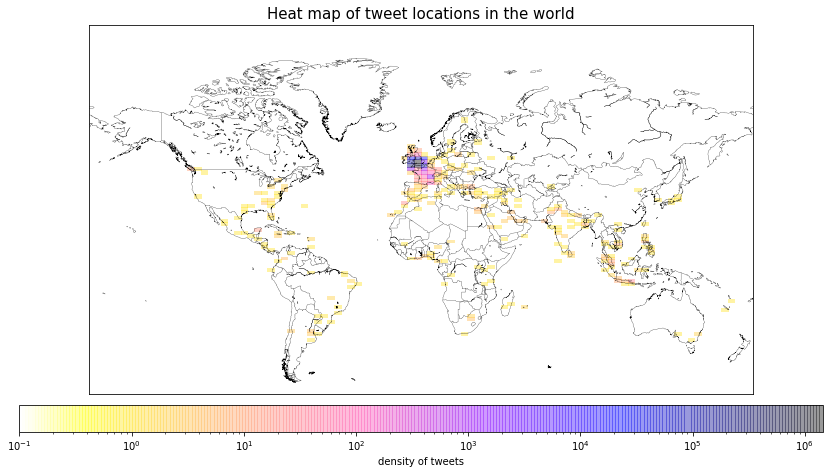

In [54]:
heat_map(
         gps_array.T,
         -180,
         -60,
         180,
         90,
         draw_countries=True,
         res='l',
         nbins=100,
         colmap='gnuplot2_r',
         fig_title='Heat map of tweet locations in the world',
         )

The colour map had to be normalized because of the huge difference in tweets from different locations. It is apparent most of the density is in the UK.

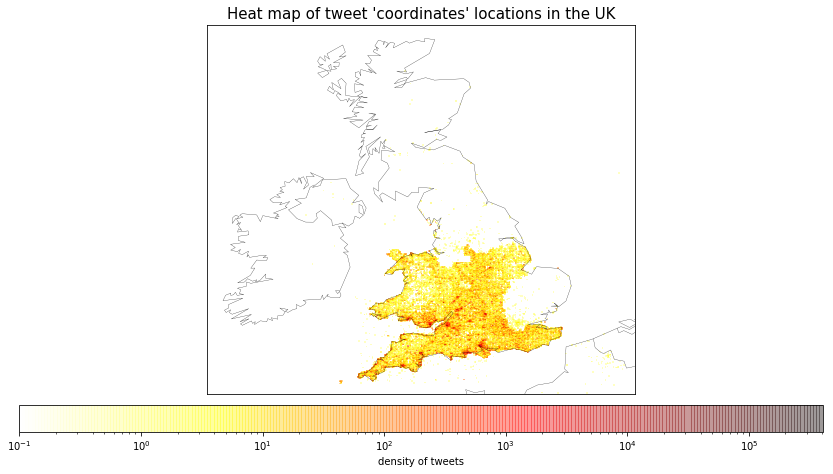

In [55]:
heat_map(
         gps_array.T,
         -11,
         49.6,
         4,
         59,
         draw_countries=True,
         res='l',
         nbins=800,
         colmap='hot_r',
         fig_title='Heat map of tweet \'coordinates\' locations in the UK',
         )

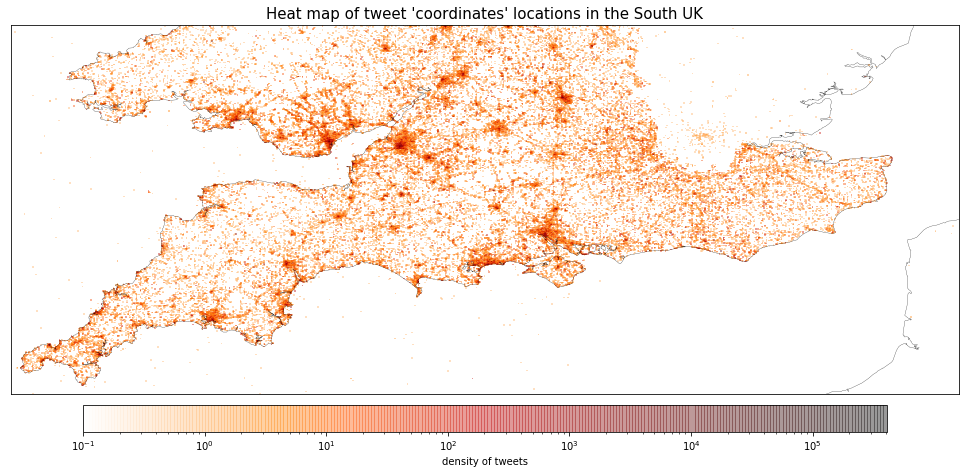

In [180]:
heat_map(
         gps_array.T,
         -5.8,
         49.9,
         2,
         52.2,
         draw_countries=True,
         res='h',
         nbins=800,
         colmap='gist_heat_r',
         fig_title='Heat map of tweet \'coordinates\' locations in the South UK',
         )

It is apparent that all major population centres are well represented in the area; such as Plymouth, Exeter, Bristol, Cardiff, Portmouth, Swindon, Oxford and Reading being easily identifiable. It is also possible to view road networks and structures such as the M5 motorway. 

The distribution of twitter activity is as expected in that densely populated areas are darker than less densely populated areas. Where there are more people, there are more tweets.

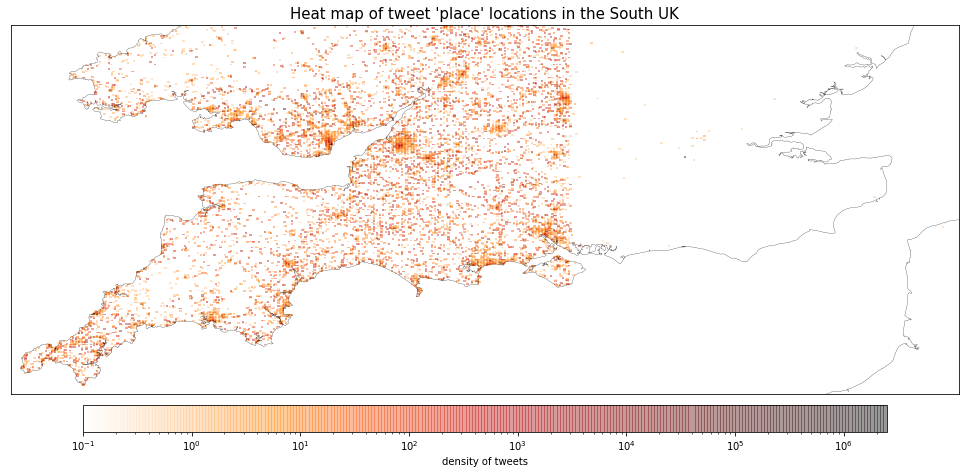

In [181]:
heat_map(
         place_array_t2.T,
         -5.8,
         49.9,
         2,
         52.2,
         draw_countries=True,
         res='h',
         nbins=800,
         colmap='gist_heat_r', 
         fig_title='Heat map of tweet \'place\' locations in the South UK',
         )

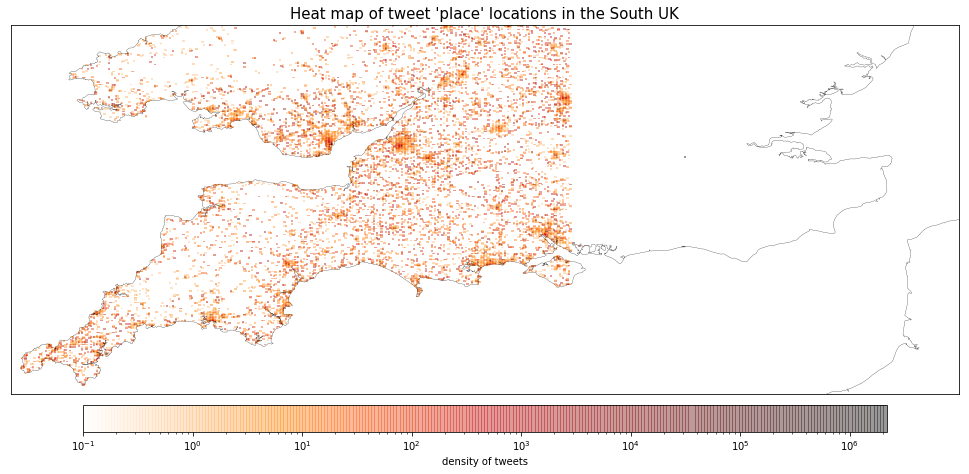

In [486]:
heat_map(
         place_array_t1.T,
         -5.8,
         49.9,
         2,
         52.2,
         draw_countries=True,
         res='h',
         nbins=800,
         colmap='gist_heat_r', 
         fig_title='Heat map of tweet \'place\' locations in the South UK',
         )

The distribution of the tweet 'place' metric is different to that of 'coordinates'.  The heat map of 'place' looks less like population density, more uniform and it is harder to identify cities and structures. This supports the earlier hypothesis of the 'place' metric being less associated with a user's actual location.

In [58]:
# Now we will get the tweets per user data

user_df = DataFrame.from_dict(user_counts_dict, orient='index')

user_df.reset_index(level=0, inplace=True)

user_df.columns=['user', 'count']
 
print(user_df[:10])

print(len(user_df))

              user  count
0    YMCAEastHerts      1
1       Conks1arda     23
2        Saaaammmy    794
3    TaylorLewis15     68
4     SamMcDermaid    877
5  danthedrummer12      8
6  meganfrickleton      9
7    kingsausageuk     87
8           ajjmcd     93
9  carly_sylvester    376
712863


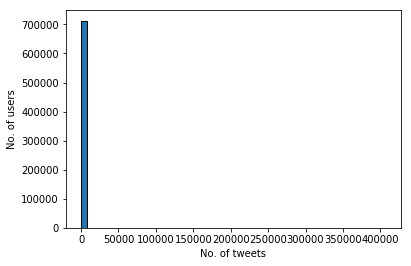

In [63]:
figure()

hist(user_df['count'], ec='k', bins=50)

xlabel('No. of tweets'); ylabel('No. of users')

show()

There are many users with few tweets and few users with many tweets. This makes it difficult to visualize the full data on a histogram. Adding limits to the data we can visulaize more:

In [61]:
# We'll use a mask to filter out the extremes

n, m = 2000, 40000

mask = (user_df['count'] > n) & (user_df['count'] < m)

print('number of users: %s' % len(user_df[mask]))

number of users: 1084


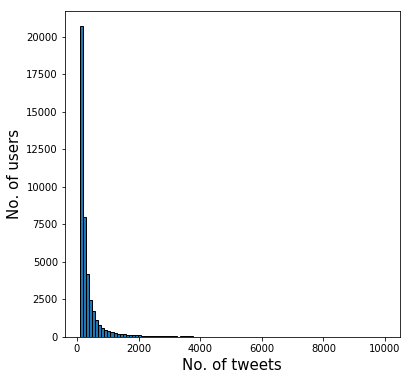

In [67]:
figure(figsize=(6, 6))

hist(user_df['count'][mask], ec='k', bins=100)

xlabel('No. of tweets', fontsize=15); ylabel('No. of users', fontsize=15)

show()

Cutting out the users with few tweets and users with many tweets it is easier to visualize the data.

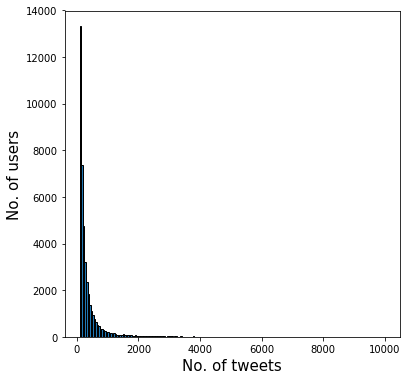

In [66]:
n, m = 1e2, 1e4
mask = (user_df['count'] > n) & (user_df['count'] < m)

figure(figsize=(6, 6))

hist(user_df['count'][mask], ec='k', bins=200)

xlabel('No. of tweets', fontsize=15); ylabel('No. of users', fontsize=15)

show()

The distribution shows that a vast majority of people very rarely tweet.

In [68]:
tweet_counts = {}

def counter(iterable):
    '''
    Counts the frequency of entities in the input iterable
    a corresponding dictionary data structure.
    
    Args:
        iterable    - a list containing entities to count
                  
    Returns:
        dictionary  - where key and value are entity and frequency
                      respectively 
    '''
    
    dictionary = {}
    
    for thing in iterable:

        if thing in dictionary:

            dictionary[thing] += 1

        else:

            dictionary[thing] = 1
            
    return dictionary

In [69]:
tweet_counts = counter(user_df['count'])

In [70]:
tweet_count_df = DataFrame.from_dict(tweet_counts, orient='index')

tweet_count_df.reset_index(level=0, inplace=True)

tweet_count_df.columns=['num of tweets', 'num of users']

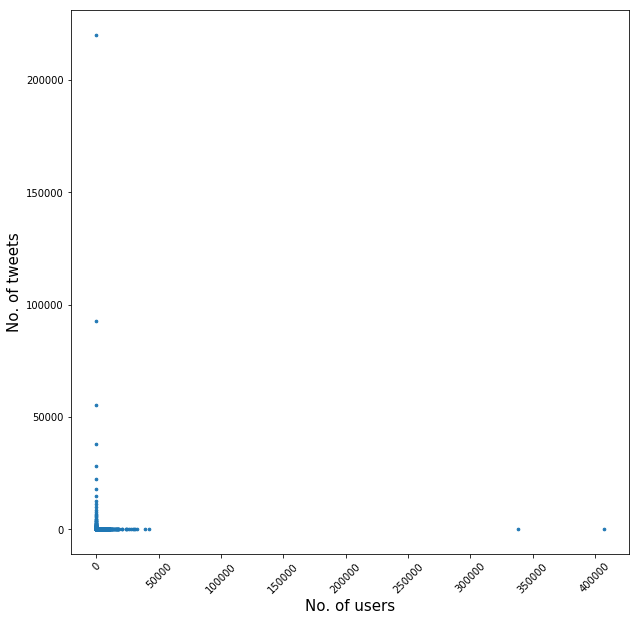

In [71]:
figure(figsize=(10, 10))

scatter(tweet_count_df['num of tweets'], tweet_count_df['num of users'], s=7)

xticks(rotation=45)

xlabel('No. of users', fontsize=15); ylabel('No. of tweets', fontsize=15)
show()

The above scatter plot allows one to visualize the disparity in the data. A very few users are responsible for a large fraction of the tweets. For any frequency of words count analysis, these users may skew the results. They may impose too much weight on certain words especially if these users are bots. Their tweets may be repetitive and therefore, their words may make up a large portion of the most frequent words. Next is to identify the users who have authored the most tweets and consider filtering them out.

In [75]:
ten_most = user_df.nlargest(10, 'count')

ten_most_tweets = {user: [] for user in ten_most['user']}

print(ten_most)

                   user   count
4461        PenYRenglyn  406785
57      OxfordSolarLive  338213
935      VirtualJukebox   41999
336        TribunDANTON   39053
27047   area_code_check   32323
26              Biddybt   31159
176            TrendsUK   30024
412815      ckoicetitre   29783
85        JackyHolyoake   27793
687        TrendsFrance   26361


In [76]:
# Now to retrieve some tweets from the above users
# I will save in a pickle below

for fname in file_names:
    list_of_tweets = load_pickle(fname)
    for tweet in list_of_tweets:
        if tweet['screen_name'] in ten_most_tweets: # count tweets per user
            ten_most_tweets[tweet['screen_name']].append(tweet)
               

In [77]:
dump_pickle('ten_most_tweets', ten_most_tweets)

In [84]:
# Load up this to skip the above

ten_most_tweets = load_pickle('ten_most_tweets')

In [91]:
def random_sample(list_of_tweets, n):
    '''
    Returns n random tweets from a list of tweet objects
    '''
    l = len(list_of_tweets)
    
    tweets = []
    
    for _ in range(n+1):
        r = randint(l)
        #tweet = list_of_tweets[r]
        tweets.append(list_of_tweets[r]['tweet'])
                      
    return tweets

In [34]:
for user in ten_most_tweets:
    
    print('\n%s:\n' % user, *random_sample(ten_most_tweets[user], 5), sep='\n')


PenYRenglyn:

16:26 GMT: Temperature: 6.2°C, Wind: S, 0 mph (ave), 0 mph (gust), Humidity: 85%, Rain (hourly) 0.0 mm, Pressure: 1018 hPa, rising slowly
12:57 BST: Temperature: 26.1°C, Wind: SSE, 2 mph (ave), 7 mph (gust), Humidity: 35%, Rain (hourly) 0.0 mm, Pressure: 1016 hPa, falling slowl
17:58 GMT: Temperature: 7.7°C, Wind: S, 0 mph (ave), 0 mph (gust), Humidity: 88%, Rain (hourly) 0.0 mm, Pressure: 1018 hPa, rising slowly
01:22 GMT: Temperature: -0.6°C, Wind: S, 0 mph (ave), 0 mph (gust), Humidity: 87%, Rain (hourly) 0.0 mm, Pressure: 1005 hPa, falling slowly
02:54 BST: Temperature: 13.3°C, Wind: WNW, 1 mph (ave), 6 mph (gust), Humidity: 92%, Rain (hourly) 0.0 mm, Pressure: 1020 hPa, steady
23:58 BST: Temperature: 15.4°C, Wind: WSW, 0 mph (ave), 2 mph (gust), Humidity: 84%, Rain (hourly) 0.0 mm, Pressure: 1017 hPa, rising slowly

OxfordSolarLive:

0 watts.
64% Battery = 1.28kWh https://t.co/aBaLV5wQLZ
451 watts. https://t.co/ILaLyQHMZM
2236 watts. https://t.co/bgCqj4Q4tf
1117 wat

Of the ten most frequent twitter users; most seem to exhibit bot-like behavior. Their tweets often have a repeating pattern or template format and only a few words are changed with each post. The accuracy in the repetition of the format is indicative of non-human posting as humans typically do not post in this consistent manner. Furthermore, the purpose of their posts do not change over time. Some of the bots are advertising things and often post links to websites. Users PenYRenglyn and OxfordSolarLive appear to be a reporting meteorological and solar data, respectively and are the most obvious bots. The only variation in their posts are the numbers they are reporting. VirtualJukebox, TrendsUK, TrendsFrance and ckoicetitre also exhibit repetitive bot-like behavior but thier posts vary more, the repetitive element may just be a single word. For instance VirtualJukbox posts song names which may contain anthing; a person's name or a phrase, followed by the hashtag #nowplaying. This makes them more difficult to filter out as the song names are more likely to contain words in which we are interested. However, the purpose of the tweets remains static over time; VirtualJukebox appears to be reporting the current song playing on a radio show or in a club. The users who seem most human are: JackyHolyoake, Biddybt and TribunDANTON due to the non-repetitive nature of the posts.

Now to further investigate the three peaks identified earlier in the tweets per day plot.

In [86]:
day_df = DataFrame(day_counts_dict).T

day_df = day_df.set_index('datetime') # Set as index so I can create a mask comparing the datetime objects

day_df['count'] = day_df['count'].astype(int64) # For some reason pandas converts the counts into floats so this
                                                # is necesary

masks = [
         (day_df.index > '2016-06-15') & (day_df.index  < '2016-07-10'),  # point of interest 1
         (day_df.index > '2016-11-01') & (day_df.index  < '2016-12-01'),  # point of interest 2
         (day_df.index  > '2017-05-01') & (day_df.index  < '2017-07-01'), # point of interest 3
        ]
    
for i, mask in enumerate(masks):
    
    loc = day_df[mask]['count'].idxmax()
    
    print('POI%s:\n%s\n' % (i+1, day_df.loc[loc]))

POI1:
count    129658
Name: 2016-06-24 00:00:00, dtype: int64

POI2:
count    86010
Name: 2016-11-09 00:00:00, dtype: int64

POI3:
count    63675
Name: 2017-06-09 00:00:00, dtype: int64



The above yields three specific dates: 24 June 2016, 09 Nov 2016 and 09 June 2017 which are PO1 to 3 as discussed previously. 

In [87]:
# We now have specific dates and know which pickles contain those dates
# now to collect the tweets

poi_fnames = ['southwestall201606', 'southwestall201611', 'southwestall201706']

location_dict = {
                '24 Jun 2016': [],
                '09 Nov 2016': [],
                '09 Jun 2017': []
                } 

In [88]:
# Collects tweets for POIs

for fname in poi_fnames:

    list_of_dicts = load_pickle(fname)
    
    for tweet in list_of_dicts:
        
        if tweet['created_at'] in location_dict:
            
            location_dict[tweet['created_at']].append(tweet)

In [89]:
dump_pickle('location_dict', location_dict)

In [ ]:
location_dict = load_pickle(location_dict)

In [92]:
print(*random_sample(location_dict['24 Jun 2016'], 5), sep='\n')

Talk about ups and downs #EURefResults  massive down #beautifulnewgranddaughter arrives safely this morning massive up!
Can't wait to see catfish at boardmasters, gunna be insaneeeeeee
@SlattCatt Agreed , delusional older generation . Still sees Europe as the enemy . At no point in my life have I ever felt ruled by Europe !
What a result .... Brilliant .... Goodbye EU ....
@MichelleLomas1 morning bootiful, have a fabarooney weekend x
@Nigel_Farage we should be thanking you! It was your snowball at the start! The people have spoken!


In [592]:
print(*random_sample(location_dict['09 Nov 2016'], 5), sep='\n')

@TheLippieLady you start getting all hot and flustered with panic!
It doesnt take X-Ray vision to see that you should be directing this at the racist rapist who just got elected inst… https://t.co/SgpwOCxE2b
@saraveizaj happy birthday!🌹xx
Cornwall reacts to Donald Trump taking the lead over Hillary... https://t.co/acLvx9j74V #Cornwall #Kernow https://t.co/ggSm9Citc3
Actuellement « Blade Down » de « Synapson » sur Virgin Radio #ckoicetitre
@DVATW Yes they have insulted Trump non stop, insisted that he is a criminal for being heterosexual, now insist that his voters were thick.


In [593]:
print(*random_sample(location_dict['09 Jun 2017'], 5), sep='\n')

@clayroutledge @spikedonline @jowilliams293 Students? #Bribery
Ugh.. #Menopause #feelingdizzy ....
If your there how come I past one of your lorries on A34 at Winchester this morning ? https://t.co/zidu6rBUxu
News 32 https://t.co/dcHNJvxbNG
Wind W/4kts (10min. ave.), F2, 8kts (Gust), OAT 15.8C, UV Index 1.8, QNH 1011.75, Rain 0.0 mm/hr, SR 04:56hrs, SS 21:25hrs
Bad Blood by Bastille is #nowplaying in Parade Bar, Bath.


The following functions are for generating a wordcloud. I filtered some of the bot-authored tweets to exclude some of their content from the wordclouds.

In [48]:
def generate_wordcloud(
                       list_of_tweets,
                       stopwords=None,
                       n=100, 
                       m=100, 
                       sample_func=random_sample
                      ):
    '''
    Creates a wordcloud from a list of tweets
    
    Args:
        list_of_tweets - list: containing dictionaries representing a tweet
        stopwords      -list: of strings of words to be excluded from the wordcloud
        n              - int: number of tweet samples to make cloud from
        m              - int: number of words in the wordcloud
        sample_func    - function: randomly samples n tweets from list_of_tweets
        
    Returns:
        WordCloud      - figure: showing the most common words in the sample
        
    '''
    
    text = ' '.join(random_sample(list_of_tweets, n)) # randomly samples tweets and joins into 1 string
        
    stopwords = set(STOPWORDS).union(stopwords)
        
    wordcloud = WordCloud(
                          max_font_size=50,
                          max_words=m,
                          stopwords=stopwords,
                          background_color='white',
                          ).generate(text)
                   
    figure(figsize=(14, 14))
                   
    imshow(wordcloud, interpolation='bilinear')
                   
    #axis('off')
                   
    show()

In [49]:
def remove_inner_punctuation(word_list, punc=':'):
    '''
    
    Removes internal punctuation - just colons at
    the moment
    
    '''
    
    l = []
    
    for word in word_list:
        
        l.extend(word.split(punc))
        
    return l
        

In [50]:
def remove_back_punctuation(word, punc='\'"”’-_.,,;:?!)]}*\\|/%'):
    '''
    Removes punctuation from the end of a word. Will also remove
    apostrohes followed by s ('s).

    Args:
        word   - string
        
    Returns:
        string - minus any punctuation on the end
        
    '''
    return word.rstrip(punc).replace('’s', '').replace('\'s', '')

In [51]:
def remove_front_punctuation(word, punc='\'"“‘-_,;:!#~([{£$*+-=\\|/'):
    '''
    Removes punctuation from the beginning of a word. 

    Args:
        word   - string
        
    Returns:
        string - minus any punctuation at the beginning of the word
        
    '''      
    return word.lstrip(punc)

In [52]:
def bot_stopwords(list_of_bots, dict_of_lists, n=50, s_func=random_sample):
    '''
    
    Randomly samples tweets produced by the bots and returns a single list containing all
    words from all bots
   
    Args:
        list_of_bots  - list: of strings of bot user names
        dict_of_lists - dictionary: containing lists of tweets by the bots where the
                        bot names are keys
        n             - int: size of random sample of tweets for each bot
        s_func        - function: function: randomly samples n tweets from dict_of_lists
    
    Returns:
        list          - list: of words

    '''
    
    text = []
    
    for bot in list_of_bots:
        
        text.append(' '.join(random_sample(dict_of_lists[bot], n)))
        
    words = ' '.join(text).split()
    
    return words

In [53]:
def k_most(counts_dict, k=20):

    df = DataFrame.from_dict(counts_dict, orient='index')

    df.reset_index(level=0, inplace=True)

    df.columns=['word', 'count']

    return set(df.nlargest(k, 'count')['word'])
    

I chose the most repetative bots which were having an impact on the word clouds.

In [54]:
list_of_bots = [
                'PenYRenglyn',
                'OxfordSolarLive',
                'area_code_check',
                'TrendsFrance',
                ]

In [55]:
remove_punc = compose(remove_front_punctuation, remove_back_punctuation)

In [56]:
harvested_words = bot_stopwords(list_of_bots, ten_most_tweets, n=1000)

In [57]:
split_words = remove_inner_punctuation(harvested_words)

In [58]:
clean_harvested_words = map(remove_punc, split_words)

In [59]:
counts = counter(clean_harvested_words)

In [60]:
# I added a custom set of stopwords as
# these seem to be incredibly common

stopwords = k_most(counts, k=500).union({'amp', 'co', 'now', 'will', \
                                         'good', 'today', 'new', 'people', 'thank', 'day'}) 

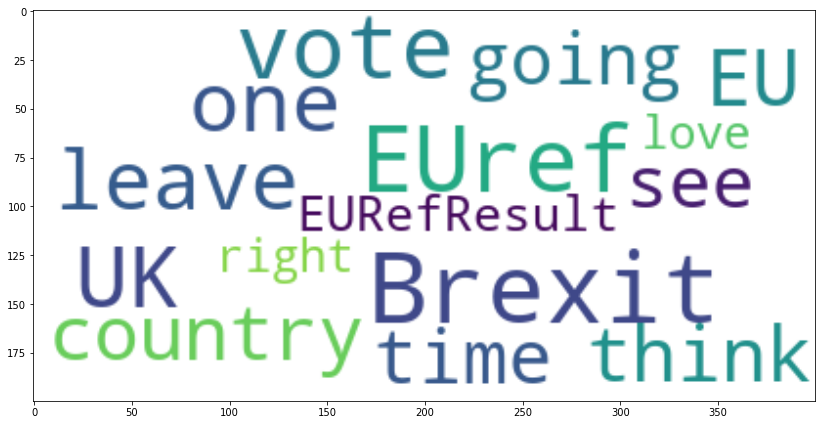

In [62]:
generate_wordcloud(location_dict['24 Jun 2016'], stopwords, n=2000, m=15)

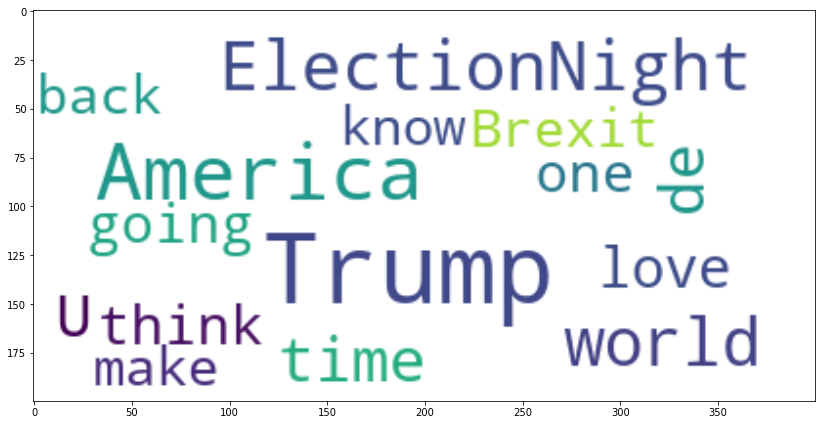

In [63]:
generate_wordcloud(location_dict['09 Nov 2016'], stopwords, n=2000, m=15)

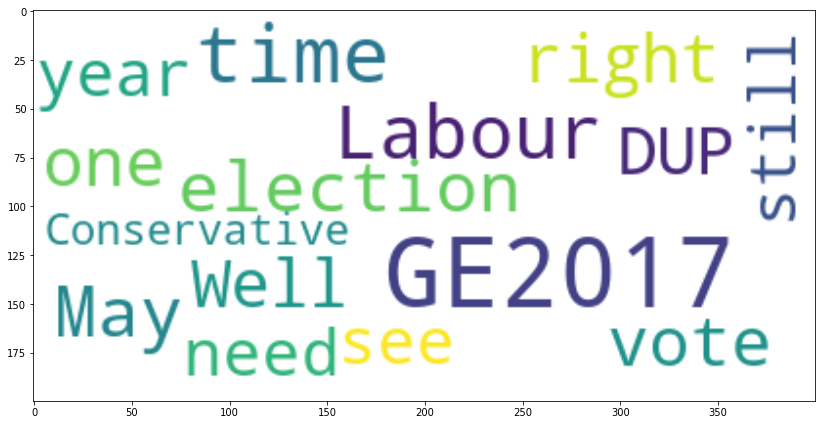

In [64]:
generate_wordcloud(location_dict['09 Jun 2017'], stopwords, n=2000, m=15)

Looking at the samples of tweets from the POI and the word clouds one can determine the high Twitter activity spikes to be due to:

24 Jun 2016: UK referendum to leave the EU were announced. 

09 Nov 2016: US election

09 Jun 2017: UK general election

The tweet per day plot highlighted three events where there was a spike in Twitter activity. Overall, the number of tweets per day since the initial spike seems to have declined over time. It may be necessary to gather more data for before this event to support this inference, but it looks like there was a build-up to the event on 24 Jun 2016. This build-up reached a climax on 24 Jun 2016 and since then there has been a decline in Twitter activity. The mapping of location data shows that the Southwest UK was being tagged by people in other countries. People in other countries have an interest in the outcome of matters such as the UK referendum. When looking at the wordclouds produced from tweets on these days the words 'Brexit' and 'EURefResult' are very well represented on 24 Jun 2016, which supports this hypothesis. However, the random samples of tweets do not yield much information. Tweets from the bot PenYRenglyn are often included which makes it diffulct to extract useful information. Bots such as that are likely to be included as most posts are aurthored by them. The wordclouds work better because they take into account the frequency of single words. And bots, which may have a large weighting on the most frequent words, can been filtered out. 
 
Looking at random samples of tweets from the POI, as above, it does seem that the vast majority are politically themed and some support the earlier inferences of what caused the increase in twitter activity. Although, it is apparent that a lot of them are about the UK referendum from all three dates. Perhaps the other political events occuring added fuel to tensions that were already present. The wordclouds, however, support the hypothesis that POI2 and POI3 were the US election and the UK general election.

A quick Google search of the dates yields the following events:

PO1:

The day before was the result of the brexit referendum - Brexit referendum: United Kingdom votes to leave the European Union -https://www.onthisday.com/date/2016/june/23

Resignation of David Cameron as Prime Minister of the UK. - https://www.onthisday.com/date/2016/june/24

'Prime Minister David Cameron made a statement in Downing Street on the outcome of the referendum on the UK's membership of the European Union' -- https://www.gov.uk/government/speeches/eu-referendum-outcome-pm-statement-24-june-2016

POI2:

Donald Trump wins presidential election - https://www.theguardian.com/us-news/2016/nov/09/donald-trump-wins-us-election-news

Alabama Republican Senate candidate Roy Moore accused of sexual misconduct with teenage girls in "Washington Post" report

Five women detail sexual misconduct by comedian Louis C.K. in "New York Times" report

Saudi Arabia's attorney general Sheikh Saud al-Mojeb says 201 more people have been held for questioning in anti-corruption drive

Fred Cole, American rock artist (The Lollipop Shoppe, Dead Moon, Pierced Arrows), dies from cancer at 69

Hans Vermeulen, Dutch singer and guitarist (Sandy Coast), dies at 70

John Hillerman, American actor (Magnum PI, Chinatown, Blazing Saddles), dies at 84

POI3:

The day before was the UK general election which resulted in a hung parliament - https://www.theguardian.com/politics/ng-interactive/2017/jun/08/live-uk-election-results-in-full-2017

The day before: Ex-FBI chief James Comey testifies to a US Senate committee that US President Donald Trump told "lies plain and simple" - https://www.bbc.co.uk/news/live/world-us-canada-40193177

Batman died: Adam West dies at 88 - https://www.bbc.co.uk/news/world-us-canada-40235142

Tennis player Venus Williams causes car accident that leads to death of another passenger in Palm Beach, Florida - https://www.onthisday.com/date/2017/june/9

Based on the quick search of news events online it can be inferred that the events likely to have had the most profound effect on the number of tweets at POI1, POI2 and POI3 are the Brexit referendum result, US election result and UK election result respectively.

In [103]:
def plot_maps(data, date, metric, heat_map=heat_map):
    
    '''
    Will plot a scatter and a heatmap each time it is called
    '''
    
    scatter_map(
                data.T,
                -180, 
                -60, 
                180,
                90,
                draw_countries=True,
                fig_title='%s Tweet \'%s\' locations' % (date, metric),
                marker_size=100,
                figsize=(12, 12)
                )
    
    heat_map(
             data.T,
             -5.8,
             49.9,
             2,
             52.2,
             draw_countries=True,
             res='h',
             nbins=800,
             colmap='gist_heat_r',
             fig_title='%s Tweet \'%s\' locations in the South UK' % (date, metric),
             )

In [97]:
# split the tweets into different location metrics

def create_3_arrays(tweet_list):
    
    coords = []
    
    place1 = []
    
    place2 = []
    
    for tweet in tweet_list:
        
        if 'coordinates' in tweet:
            
            coords.append(tweet['coordinates'])
            
        if 'place' in tweet:
            
            if tweet['location_type'] == 1:
                
                place1.append(tweet['place'])
                
            else:
                
                place2.append(tweet['place'])
                
    return array(coords), array(place1), array(place2)

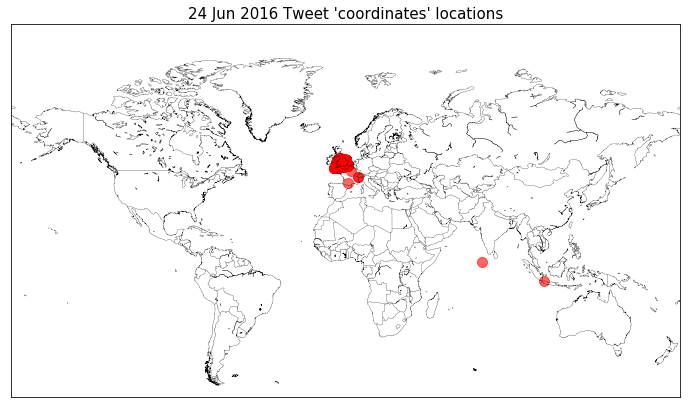

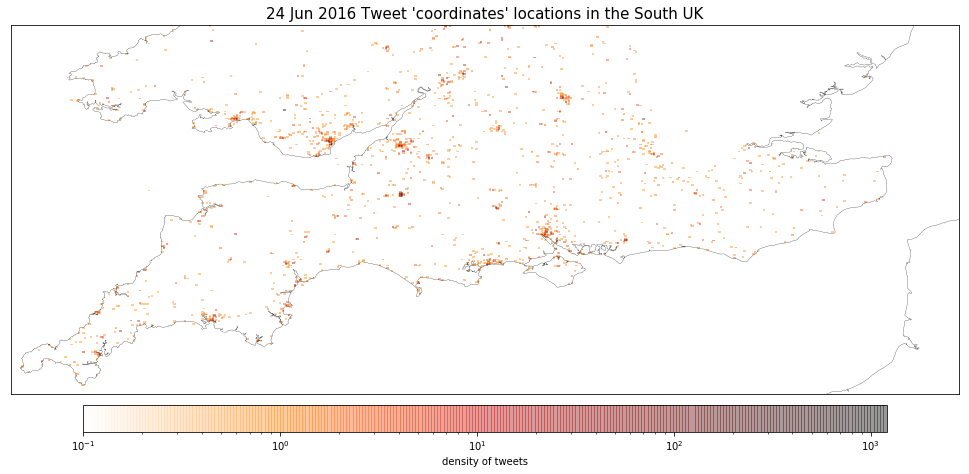

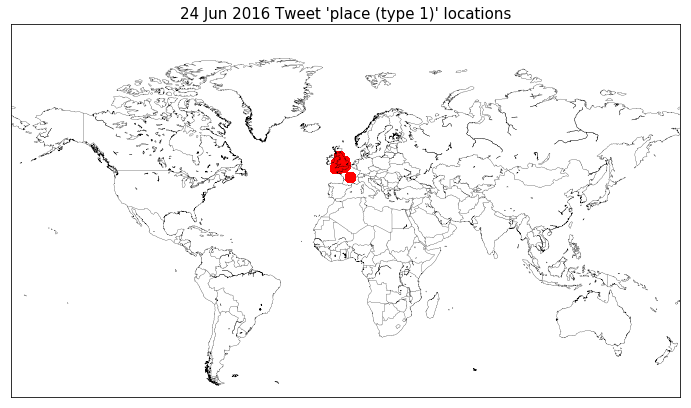

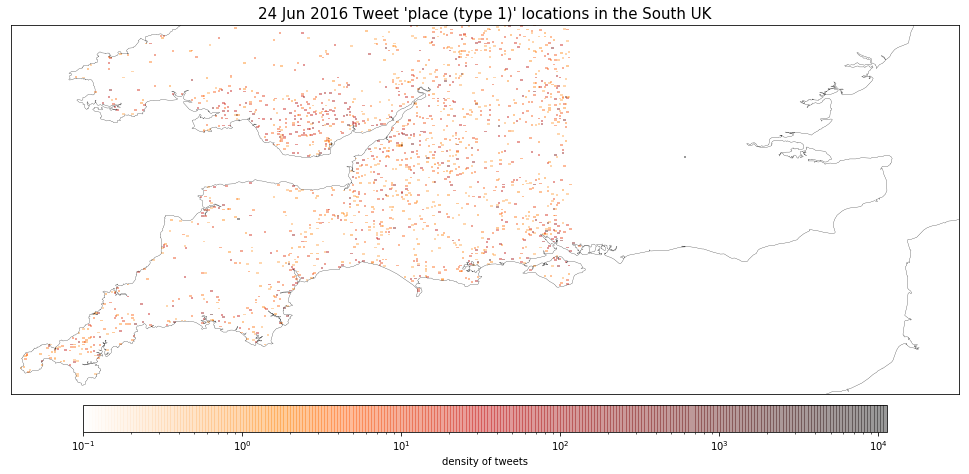

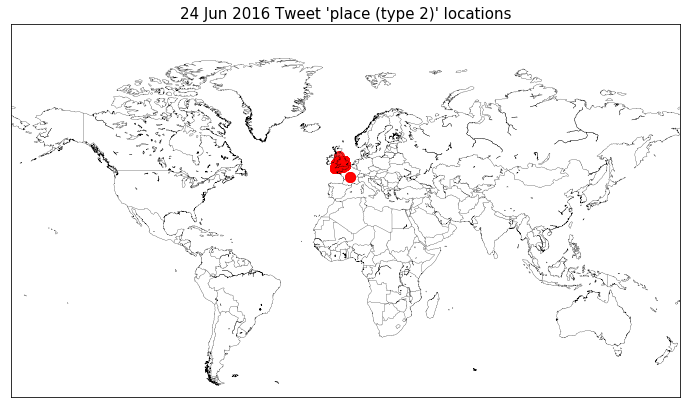

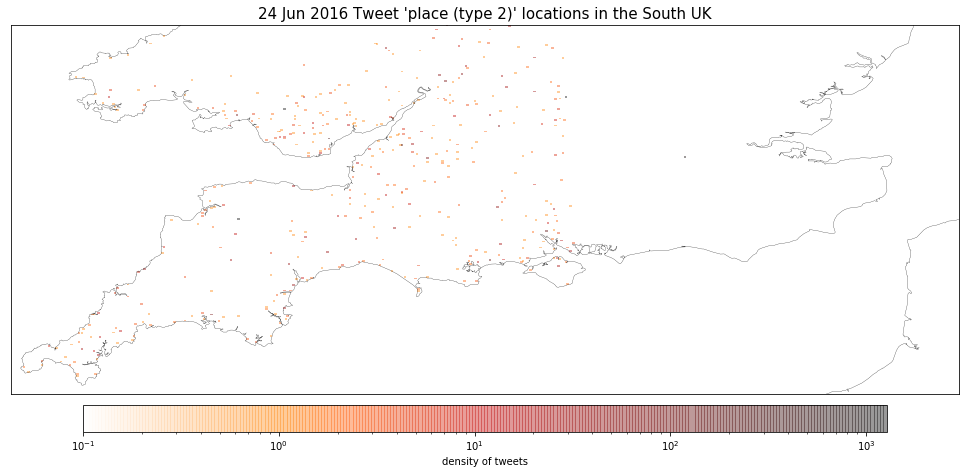

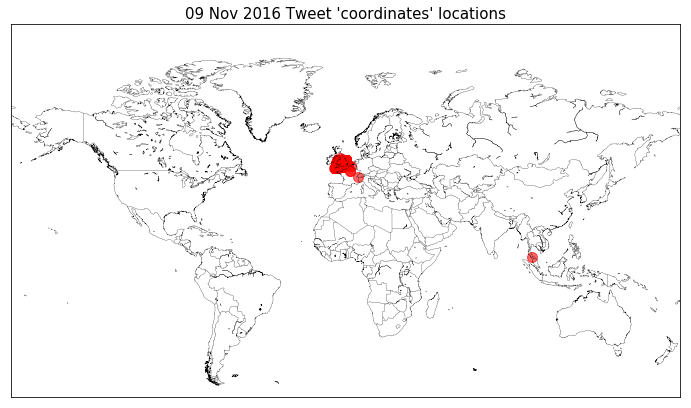

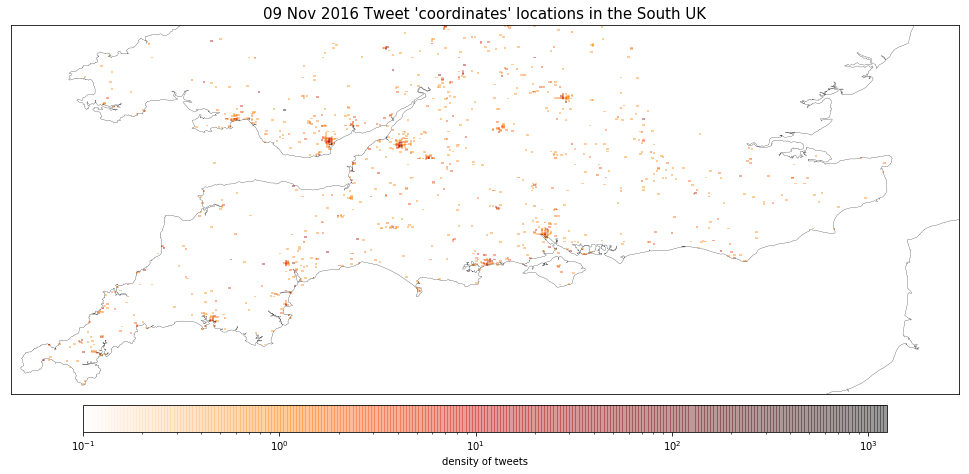

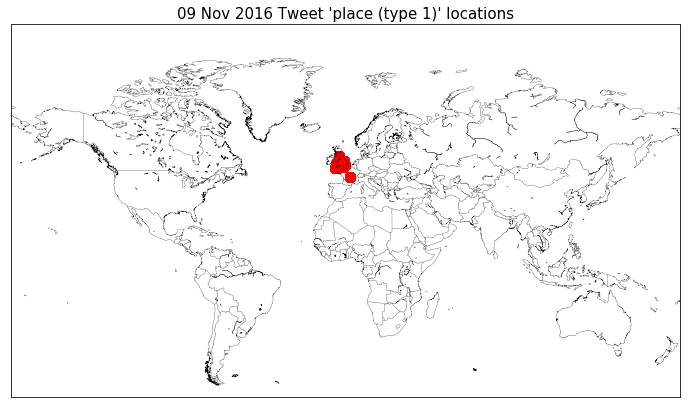

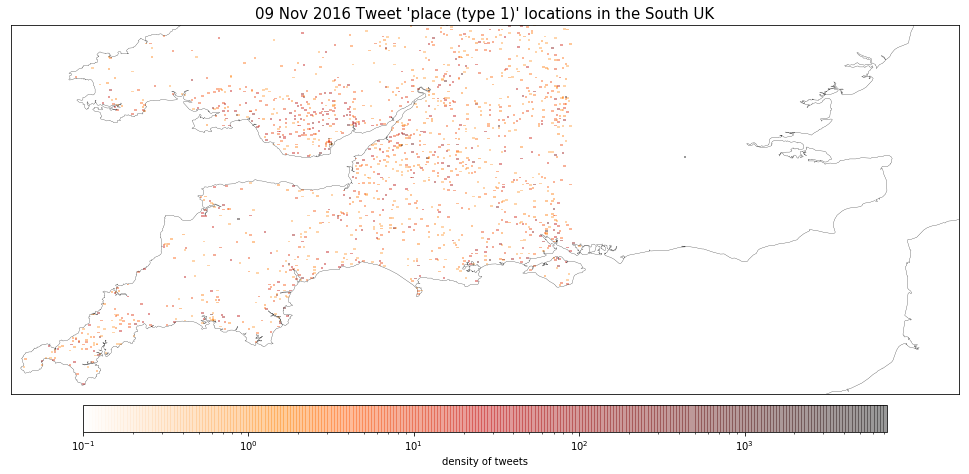

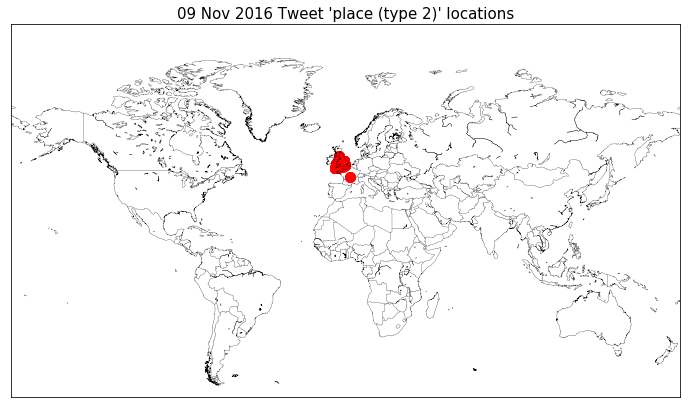

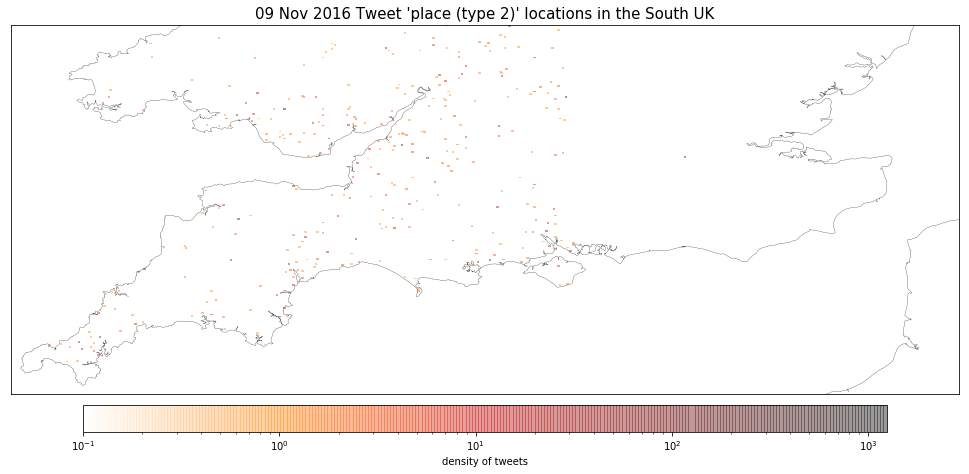

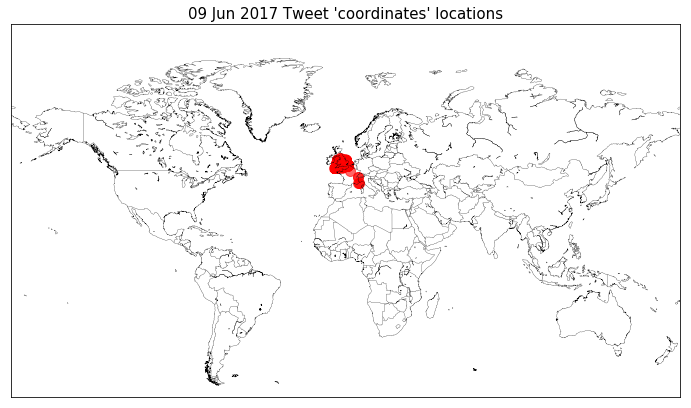

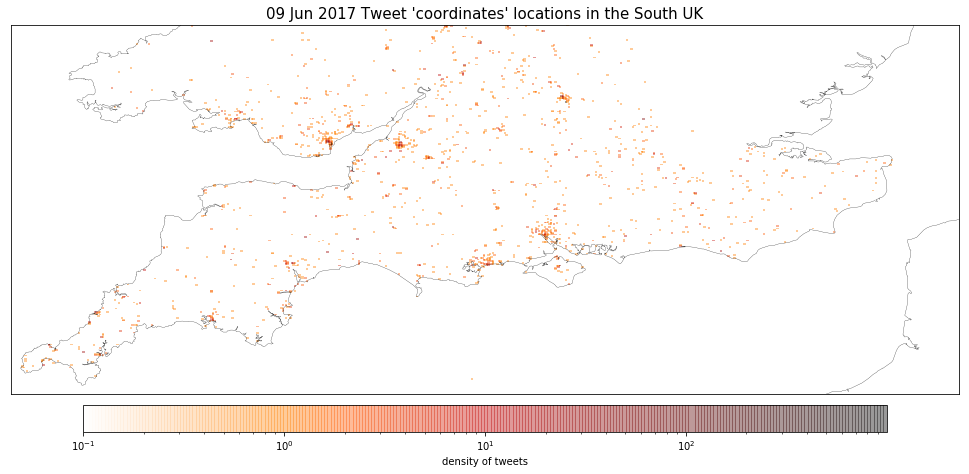

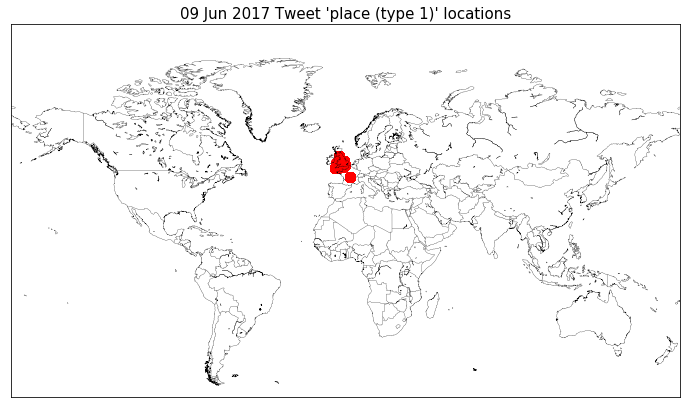

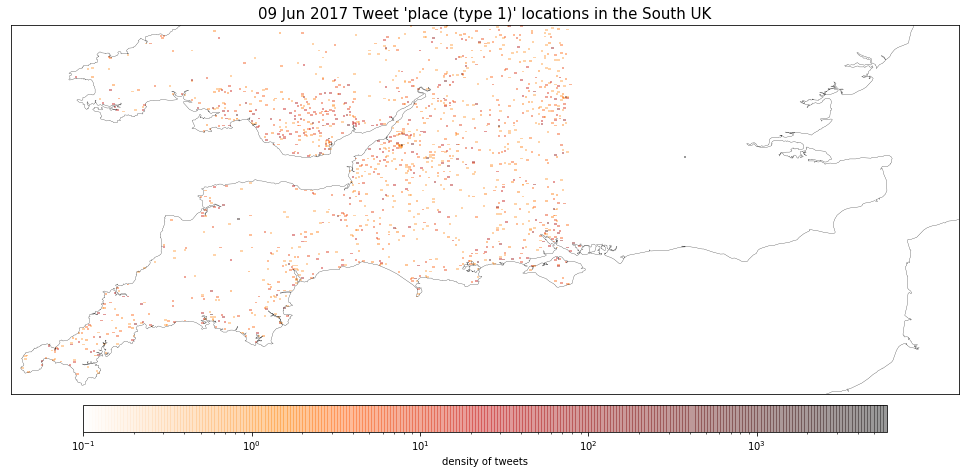

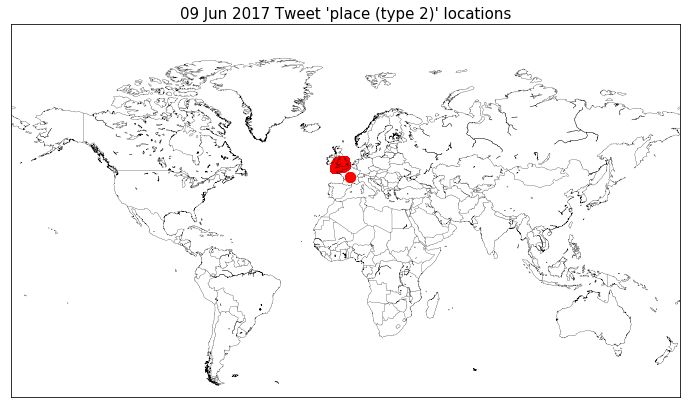

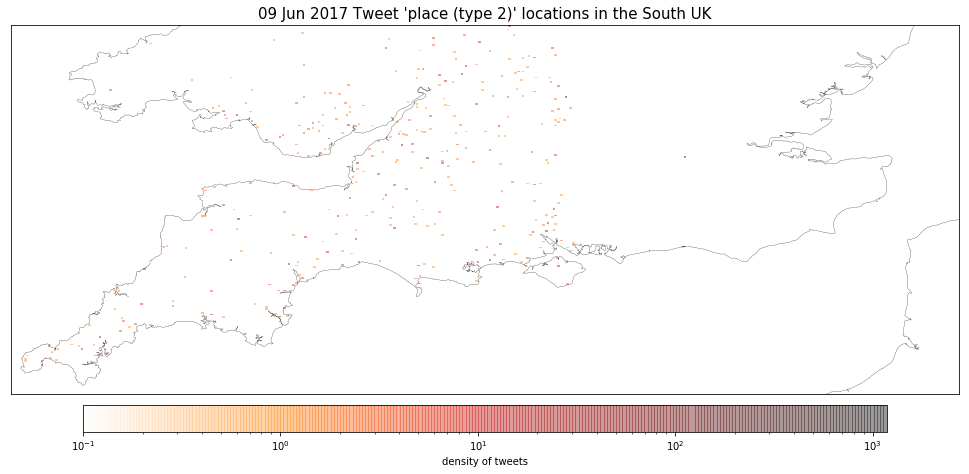

In [104]:
days = ['24 Jun 2016',
        '09 Nov 2016',
        '09 Jun 2017']

metrics = ['coordinates',
           'place (type 1)',
           'place (type 2)']

for date, data in location_dict.items():
    
    arrays3 = create_3_arrays(data)
    
    for i, arr in enumerate(arrays3):
        
        plot_maps(arr, date, metrics[i])
        
        

The above plots show the same patterns as were discussed earlier. Looking at the world maps, although they do not accurately portray quantities, there are more red dots outside of the UK in the Brexit 'coordinates' world map than with the other maps. This could suggest this event had more external interest than the other two events.

Critical Evaluation:

The work carried out in this experiment has shown the potential to extract information from Twitter about events occuring that affect a specific area. The methods could be adapted to a real-time application and used to monitor an area. However, it has been shown that there requires an element of filtering as the users who post the most tweets are bots and are not a good measure of social or political events that affect humans. The best way to filter out these bots is somewhat subjective and the choices made may affect the outcome of the results or information gained. Another issue is that Twitter has multiple location metrics and to really obtain tweets by location may require another filtering of the data. The only true measure of location, in the twitter json objects, is the field 'coordinates' and it is apparent that the vast majority of tweets do not possess this field. It is difficult to identify the true location of tweets without this metric.

Twitter allows full access of their tweet data and the users sign a terms and conditions agreement to allow their data to be used in this way. However, there may be ethical concerns depending on the application of the data. If it is possible to identify a specific person from a tweet or location in a report, or something that is published, then this could become a problem. Data scientists should be courteous, and use common sense when using people's data from twitter. However, it is possible that somebody with bad intentions could also use the data. For example, to sway an election result, influence another country or targetted advertisng. 